# Introduction

This Biodiversity in National Parks Project aims to analyze multiple data sources to determine patterns and relationships between species conservation status and their sightings at major national parks in the United States. 

This project will scope, analyze, plot, and evaluate the data to provide information necessary to answer the questions below:

1. What is the distribution of conservation status across species?
2. Are certain species more likely to face endangerment than others?
3. Is there a significant difference between species and their conservation status?
4. What animal, if any, appears to be closest to facing exctinction at this time? What is it's distribution across parks?
5. Is there an animal that is more prevelant than others? Does this prevelance differ across parks?
 
Upon answering these questions, this project will address potential issues with the data and findings, as well as open discussion for improvements and future questions that can be answered with further data collection and analysis.

### Data

Sourced from the [National Park Service](https://www.nps.gov/index.htm)

Provided by [Codecademy.com](https://www.codecademy.com/)
1. observations.csv
2. species_info.csv

# Scope
The project scope serves as a roadmap to guide the project's progress and the reader's understanding of it's goals and findings. The scope of this project has been broken down into four sections:
1. **Goals** - Define project objectives, potential problems and the actions needed to achieve and overcome them respectfully.
2. **Data** - Identify data and if it is relevant to achieve project goals. Address any concerns for reliability or needs for further data to augment future research.
3. **Analysis** - Determine how data will be analyzed, including methods used and plans for validating analysis to answer questions. 
4. **Evaluation** - Review analysis to build conclusions and discuss findings. 

### Goals
The main objective of this project is to provide insights about endagered species to the National Parks Service to aid in their efforts for biodiversity conservation. Analyst objectives include understanding the characteristics of different species/animals and their conservation status and how that compares to their distribution across the different parks.

Questions this project aims to answer include:
1. What is the distribution of conservation status across species?
2. Are certain species more likely to face endangerment than others?
3. Is there a significant difference between species and their conservation status?
4. What animal, if any, appears to be closest to facing exctinction at this time? What is it's distribution across parks?
5. Is there an animal that is more prevelant than others? Does this prevelance differ across parks?

### Data
This project includes two provided datasets. The first, observations.csv, lists the number of observations of an animal (by it's scientific name) in each national park over the last 7 days. The second, species_info.csv, includes the conservation status of different animals, both their common and scientific names, and the species they belong to. 

### Analysis
Using descriptive summary statistics and visualization techniques, this section will explore the provided data to detect patterns, uncover relationships, and provide a better understanding of the data. Statistical inference will be used to determine if the values are statistically significant to support any final conclusions. 

Key metrics to compute include:
1. Counts
2. Distributions
3. Conservation status of each species
4. Relationships between species (if any)
5. Observations of species in each park

### Evaluation
This section will revisit original goals and questions and compare to the final analysis to determine if our findings support our original objectives. Final conclusions and reflections will be drafted here. In addition, any concerns over accuracy or potential for augmentation and future research will be addressed. 

# Import Modules

In [1]:
#import Python libraries and modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#inline lead to static images of your plot embedded in the notebook, 
#notebook will lead to interactive plots (see below)
%matplotlib inline

# Load the Data

In [2]:
#load two provided datasets (csv) into dataframes
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
print(obs.head(5),'\n')
print(species.head(5))

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domesti

In [3]:
#Data Characteristics
print(f'Observations: {obs.shape}, {obs.columns}')
print(f'Species: {species.shape}, {species.columns}')

Observations: (23296, 3), Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Species: (5824, 4), Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


# Explore the Data

In [4]:
#Species Dataframe
print(f'Number of Species: {species.category.nunique()}')
print(species.category.unique())
print(species.groupby('category').size())
print(f'Species Category na values:{species.category.isnull().sum()}','\n')

print(f'Conservation Status: {species.conservation_status.nunique()}')
print(species.conservation_status.unique())
print(species.groupby('conservation_status').size())
print(f'Conservation Status na values:{species.conservation_status.isnull().sum()}','\n')

print(f'Scientific Names: {species.scientific_name.nunique()}')
print(f'Scientific Names na values:{species.scientific_name.isnull().sum()}','\n')

print(f'Common Names: {species.common_names.nunique()}')
print(f'Common Names na values:{species.common_names.isnull().sum()}')

Number of Species: 7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
Species Category na values:0 

Conservation Status: 4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
Conservation Status na values:5633 

Scientific Names: 5541
Scientific Names na values:0 

Common Names: 5504
Common Names na values:0


In [5]:
#Observations Dataframe
print(f'Number of Parks: {obs.park_name.nunique()}')
print(obs.park_name.unique())
print(f'Park Name na values:{obs.park_name.isnull().sum()}','\n')

print(f'Scientific Names: {obs.scientific_name.nunique()}')
print(f'Scientific Name na values:{obs.scientific_name.isnull().sum()}','\n')

print(f'Observations: {obs.observations.nunique()}')
print(f'Total number of observations:{obs.observations.sum()}')
print(f'Observations na values:{obs.observations.isnull().sum()}')

Number of Parks: 4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Park Name na values:0 

Scientific Names: 5541
Scientific Name na values:0 

Observations: 304
Total number of observations:3314739
Observations na values:0


### Exploration Overview

This project explores two dataframes, obs from 'species_info.csv' and species from 'observations.csv'.

Species contains 4 columns named 'category', 'scientific_name', 'common_names', and 'conservation_status' and 5824 rows of collected data. The 'category' column lists different species types, of which 7 are present in this dataset named 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', and 'Nonvascular Plant'. The 'conservation_status' column sorts the animals into different levels of conservation concern named 'Endagered', 'In Recovery', 'Species of Concern', and 'Threatened'. 5633 values are Nan in the 'conservation_status' column, meaning they were likely unlabeled due to lack of conservational concern. This value will need to be changed for further analysis. The columns 'scientific_name' and 'common_names' list the scientific and common known names of the observed animals. The columns contain 5541 and 5504 unique observations, respectfully. There are no other null values present on this dataframe.

Obs contains 3 columns named 'scientific_name', 'park_name', and 'observations', and 23296 rows of collected data. The 'park_name' column contains 4 total parks: 'Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', and 'Yellowstone National Park'. There are 5541 unique scientific names for observed animals across the parks. There are 304 unique observations and 3,314,739 total observations. No null values are present in this dataframe.

# Analysis

In [6]:
#Clean and Tidy Data
#Replace NaN Values (Conservation Status Only)
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size().reset_index()

,conservation_status,0
0,Endangered,16
1,In Recovery,4
2,No Intervention,5633
3,Species of Concern,161
4,Threatened,10


## Conservation Distribution

In [7]:
#Q1: What is the distribution of conservation status across species?
#Create a table of each conservation status and the number of different species types within
Statusby_species = species[species.conservation_status != 'No Intervention']\
.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

Statusby_species

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


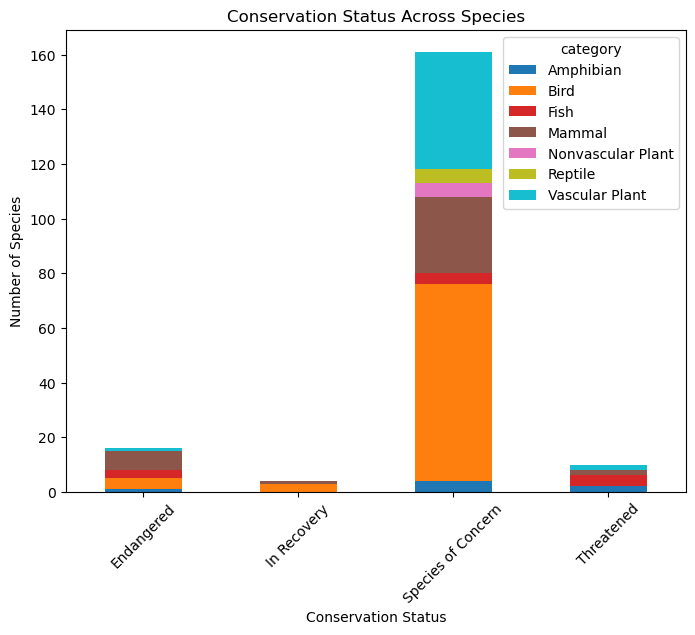

In [8]:
#Create a chart reflecting/using the data above
ax = Statusby_species.plot(kind = 'bar', figsize=(8,6), stacked=True, colormap='tab10')
plt.title('Conservation Status Across Species')
plt.xticks(rotation = 45)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.savefig('species_conservation.png', dpi = 600)

## Species and Consvervation Status

In [9]:
#Q2: Are certain species more likely to face endangerment than others?
species['is_protected'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique()\
.reset_index().pivot(columns='is_protected',index='category',values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


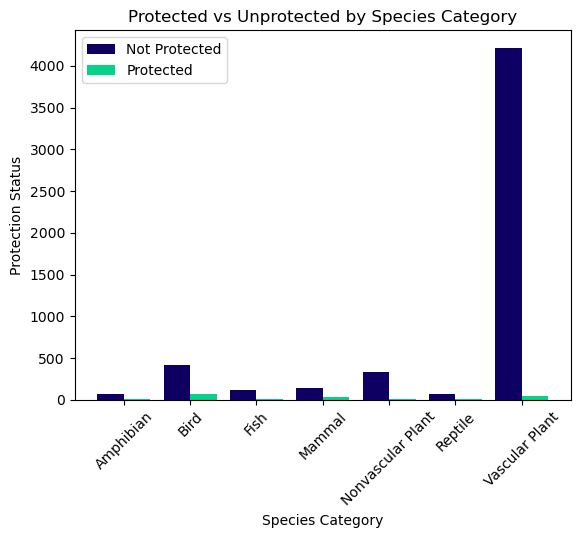

In [10]:
X_axis = np.arange(len(category_counts.category))
plt.bar(X_axis - 0.2, category_counts.not_protected, 0.4, label = 'Not Protected', color = '#0e0062')
plt.bar(X_axis + 0.2, category_counts.protected, 0.4, label = 'Protected', color = '#07d28a')
plt.legend()
plt.title('Protected vs Unprotected by Species Category')
plt.xticks(X_axis, category_counts.category, rotation = 45)
plt.xlabel('Species Category')
plt.ylabel('Protection Status')
plt.savefig('protection_category.png', dpi=600)

In [11]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


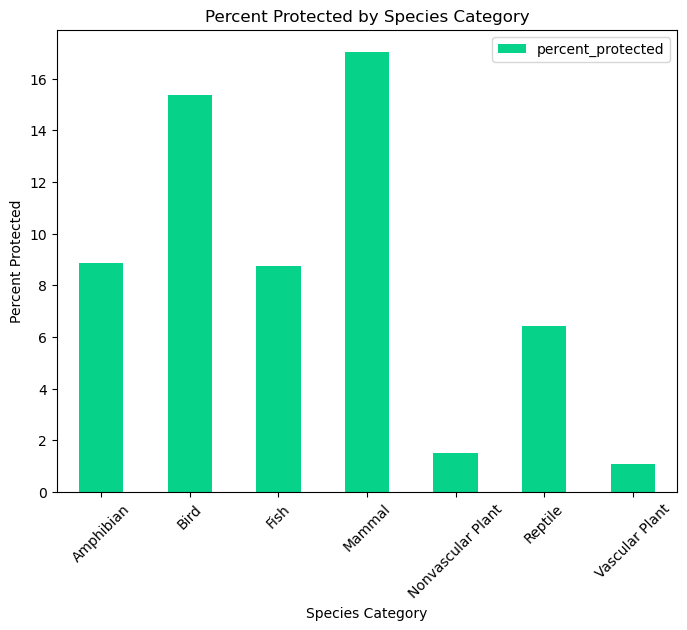

In [12]:
ax = category_counts.plot(kind = 'bar', x = 'category', y = 'percent_protected', color = '#07d28a', figsize=(8,6))
plt.title('Percent Protected by Species Category')
plt.xticks(rotation = 45)
ax.set_xlabel('Species Category')
ax.set_ylabel('Percent Protected')
plt.savefig('percent_protected.png', dpi=600)

### Statistical Significance

In [13]:
#Q3 Is there a significant difference between species and their conservation status?
#Contigency table and chi square mammal vs bird
c_table1 = [[30,146], [75, 413]]
print(chi2_contingency(c_table1))

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))


P-value: 0.69, much higher than the statistical significance standard of 0.5. This indicates no statistically significant relationship between the consvervation status of birds and mammals.

In [14]:
#Contigency table and chi square mammal vs reptile
c_table2 = [[30,146], [5, 73]]
print(chi2_contingency(c_table2))

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))


P-value: 0.39, below the statistical significance standard of 0.5. This indicates a statistically significant relationship between the consvervation status of reptiles and mammals. Mammals have a much higher rate of conservation needed than reptiles.

## Animal Observation Distribution Across Parks

In [15]:
#Q4 What animal, if any, appears to be closest to facing exctinction at this time? What is it's distribution across parks?
#Q5 Is there an animal that is more prevelant than others? Does this prevelance differ across parks?

from itertools import chain
import string

#Create function to remove punctuation in common_names column
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#Create function to remove duplicates and collapse result into single dimension list
def names_list(lst):
    #Remove duplicate names from each line item in animal_names list
    clean_rows = []
    for item in lst:
        item = list(dict.fromkeys(item))
        clean_rows.append(item)   
    #Combine all items into one dimensional list for counts
    return list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))

#Create function to create a list of counts associated with each word
def word_count(lst):
    word_count = []
    for name in lst:
        x = lst.count(name)
        word_count.append((name,x))
    return word_count

#Create function to create animal observation by park and protection status dataframe
def obs_by_park(obs):
    total_obs = obs.groupby('park_name')['observations'].sum()
    risk_obs = obs.groupby(['park_name', 'is_protected'])['observations'].sum()
    percent_protected_obs = (risk_obs.loc[:, True] / total_obs) * 100
    percent_unprotected_obs = (risk_obs.loc[:, False] / total_obs) * 100
    obs['percent_observed'] = 100 * obs['observations'] / total_obs.loc[obs['park_name']].values
    return obs

### All Species

In [16]:
#Remove punctuation from common_names column, then run through functions to prepare data for table
animal_names = species.common_names.apply(remove_punctuations).str.split().tolist()
animals_list = names_list(animal_names)

#Create table of words and associated counts in descending order
pd.DataFrame(set(word_count(animals_list)), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

#Upon initial inspection of all names, the most frequently occuring words include descriptive words regarding species color, location, etc. 
#Of the species within the top 20 most frequently occuring words, all are plant species. Need to subset data for further analysis.

,Word,Count
2404,Moss,285
2054,Sedge,227
3671,Common,185
1076,Mountain,148
4659,Grass,134
2299,Western,114
3940,American,106
301,Northern,100
138,White,95
4777,Wild,88


### At Risk

In [17]:
at_risk = species[species.is_protected == True].common_names.apply(remove_punctuations).str.split().tolist()
risk_list = names_list(at_risk)
pd.DataFrame(set(word_count(risk_list)), columns =['Word', 'Count']).sort_values('Count', ascending = False).head(20)

#The at risk species yields the highest count for bats (myotis is the classification for bats), followed by Wolves, Hawks, and Sparrows.
#These respectively reflect the species categories with the highest percentage of protected animals: Mammals and Birds.

,Word,Count
128,Myotis,15
320,Bat,12
57,Brown,7
191,Northern,6
46,Mountain,6
224,American,6
111,Western,5
168,California,5
108,Nevada,4
60,Sparrow,4


### Mammals

In [18]:
mammal_names = species[species.category == 'Mammal'].common_names.apply(remove_punctuations).str.split().tolist()
mammals_list = names_list(mammal_names)
pd.DataFrame(set(word_count(mammals_list)), columns =['Word', 'Count']).sort_values('Count', ascending = False).head(10)

#After inspection of Mammal subset of species data, the most frequently occuring species in this category is the bat 
#followed by the shrew. As seen above, the most frequently counted protected mammals were bats and wolves. 
#Will continue to perform analysis on these animal subsets of data.

,Word,Count
61,Bat,23
145,Shrew,18
191,Myotis,17
35,Mouse,16
41,Chipmunk,13
79,Squirrel,12
65,American,12
123,Eastern,11
47,Vole,11
184,Mountain,10


### Bats

In [19]:
#Create column to identify rows that contain data for bats
species['is_bat'] = species.common_names.str.contains(r'\b[bB]at\b', regex = True)

#subset of species that contains bats
species[species.is_bat]

#merge bat subset with observations
bat_observations = obs.merge(species[species.is_bat])

print(f'Total bat observations across parks: {sum(bat_observations.observations)}.')
print(f'Of {len(species[species.is_bat])} observed bat species, {len(species[species.is_bat & species.is_protected == True])}\
are protected, or {(len(species[species.is_bat & species.is_protected == True]))/(len(species[species.is_bat])) * 100}%.')

#table with total bat observations per park by percent protected status
bat_obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park(bat_obs_by_park)

Total bat observations across parks: 18992.
Of 23 observed bat species, 12are protected, or 52.17391304347826%.


,park_name,is_protected,observations,percent_observed
0,Bryce National Park,False,1596,46.489950
1,Bryce National Park,True,1837,53.510050
2,Great Smoky Mountains National Park,False,1299,53.878059
3,Great Smoky Mountains National Park,True,1112,46.121941
4,Yellowstone National Park,False,4044,48.361636
5,Yellowstone National Park,True,4318,51.638364
6,Yosemite National Park,False,2345,48.997075
7,Yosemite National Park,True,2441,51.002925


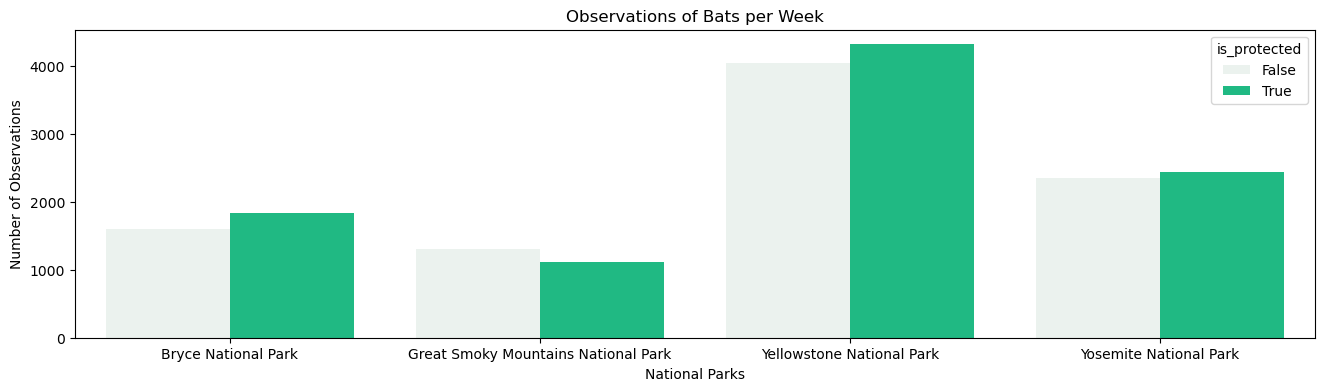

In [20]:
#barplot of bat sighiting distribution across parks, seperated by protected and not protected
plt.figure(figsize=(16, 4))
sns.barplot(x=bat_obs_by_park.park_name, y= bat_obs_by_park.observations, color = '#07d28a', hue=bat_obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.savefig('bat_obs.png', dpi = 600)
plt.show()

### Shrews

In [21]:
species['is_shrew'] = species.common_names.str.contains(r'\b[sS]hrew\b', regex = True)
shrew_observations = obs.merge(species[species.is_shrew])

print(f'Total shrew observations across parks: {sum(shrew_observations.observations)}.')
print(f'Of {len(species[species.is_shrew])} observed shrew species, {len(species[species.is_shrew & species.is_protected == True])}\
are protected, or {(len(species[species.is_shrew & species.is_protected == True]))/(len(species[species.is_shrew])) * 100}%.')

shrew_obs_by_park = shrew_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park(shrew_obs_by_park)

Total shrew observations across parks: 15016.
Of 18 observed shrew species, 1are protected, or 5.555555555555555%.


,park_name,is_protected,observations,percent_observed
0,Bryce National Park,False,2584,97.325800
1,Bryce National Park,True,71,2.674200
2,Great Smoky Mountains National Park,False,1749,96.736726
3,Great Smoky Mountains National Park,True,59,3.263274
4,Yellowstone National Park,False,6546,97.136074
5,Yellowstone National Park,True,193,2.863926
6,Yosemite National Park,False,3674,96.329313
7,Yosemite National Park,True,140,3.670687


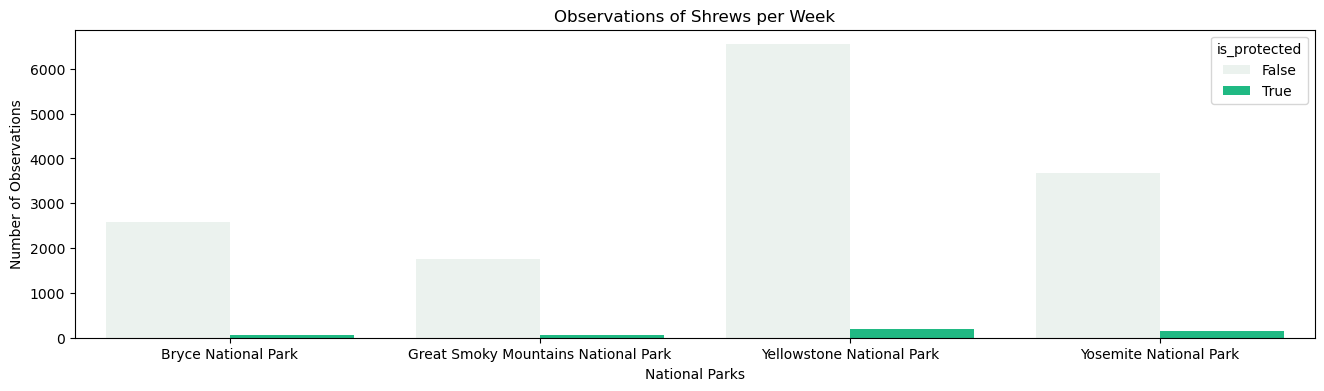

In [22]:
plt.figure(figsize=(16, 4))
sns.barplot(x=shrew_obs_by_park.park_name, y= shrew_obs_by_park.observations, color = '#07d28a', hue=shrew_obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Shrews per Week')
plt.savefig('shrew_obs.png', dpi = 600)
plt.show()

### Wolves

In [23]:
species['is_wolf'] = species.common_names.str.contains(r'\b[wW]olf\b', regex = True)
wolf_observations = obs.merge(species[species.is_wolf])

print(f'Total wolf observations across parks: {sum(wolf_observations.observations)}.')
print(f'Of {len(species[species.is_wolf])} observed wolf species, {len(species[species.is_wolf & species.is_protected == True])}\
are protected, or {(len(species[species.is_wolf & species.is_protected == True]))/(len(species[species.is_wolf])) * 100}%.')

wolf_obs_by_park = wolf_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park(wolf_obs_by_park)

Total wolf observations across parks: 4014.
Of 7 observed wolf species, 4are protected, or 57.14285714285714%.


,park_name,is_protected,observations,percent_observed
0,Bryce National Park,False,380,47.500000
1,Bryce National Park,True,420,52.500000
2,Great Smoky Mountains National Park,False,192,50.261780
3,Great Smoky Mountains National Park,True,190,49.738220
4,Yellowstone National Park,False,732,41.077441
5,Yellowstone National Park,True,1050,58.922559
6,Yosemite National Park,False,428,40.761905
7,Yosemite National Park,True,622,59.238095


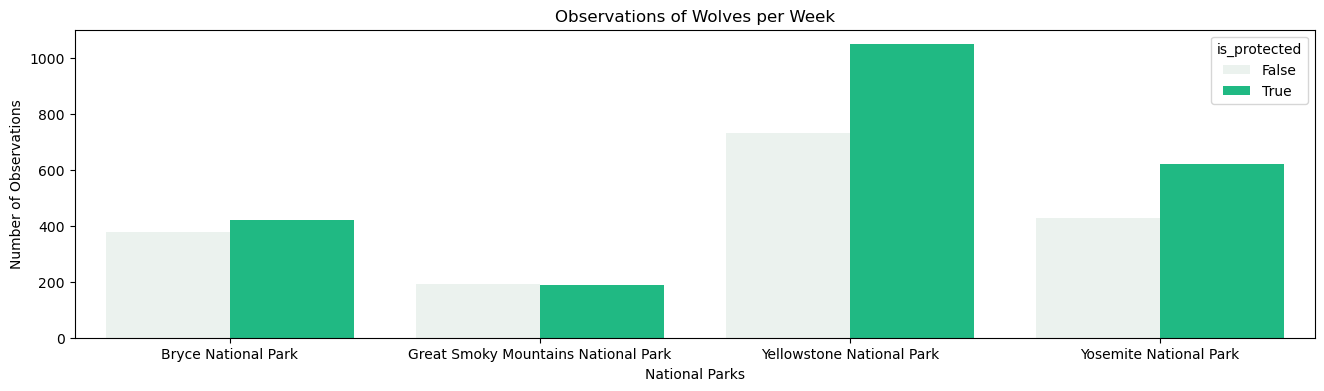

In [24]:
plt.figure(figsize=(16, 4))
sns.barplot(x=wolf_obs_by_park.park_name, y= wolf_obs_by_park.observations, color = '#07d28a', hue=wolf_obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Wolves per Week')
plt.savefig('wolf_obs.png', dpi = 600)
plt.show()

### Birds

In [25]:
bird_names = species[species.category == 'Bird'].common_names.apply(remove_punctuations).str.split().tolist()
bird_list = names_list(bird_names)
pd.DataFrame(set(word_count(bird_list)), columns =['Word', 'Count']).sort_values('Count', ascending = False).head(10)

#After inspection of Bird subset of species data, the most frequently occuring species in this category is the warbler 
#followed by the sparrow. As seen above, the most frequently counted protected birds were sparrows and hawks.
#Will continue to perform analysis on these animal subsets of data.

,Word,Count
48,Warbler,59
288,Sparrow,29
255,American,21
230,Northern,20
358,Common,18
329,Flycatcher,18
151,Owl,18
372,Western,12
391,Woodpecker,12
119,Sandpiper,11


### Warblers

In [26]:
species['is_warbler'] = species.common_names.str.contains(r'\b[wW]arbler\b', regex = True)
warbler_observations = obs.merge(species[species.is_warbler])

print(f'Total warbler observations across parks: {sum(warbler_observations.observations)}.')
print(f'Of {len(species[species.is_warbler])} observed warbler species, {len(species[species.is_warbler & species.is_protected == True])}\
are protected, or {(len(species[species.is_warbler & species.is_protected == True]))/(len(species[species.is_warbler])) * 100}%.')

warbler_obs_by_park = warbler_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park(warbler_obs_by_park)

Total warbler observations across parks: 33394.
Of 59 observed warbler species, 3are protected, or 5.084745762711865%.


,park_name,is_protected,observations,percent_observed
0,Bryce National Park,False,5565,96.614583
1,Bryce National Park,True,195,3.385417
2,Great Smoky Mountains National Park,False,4290,96.730552
3,Great Smoky Mountains National Park,True,145,3.269448
4,Yellowstone National Park,False,13995,96.603852
5,Yellowstone National Park,True,492,3.396148
6,Yosemite National Park,False,8441,96.889348
7,Yosemite National Park,True,271,3.110652


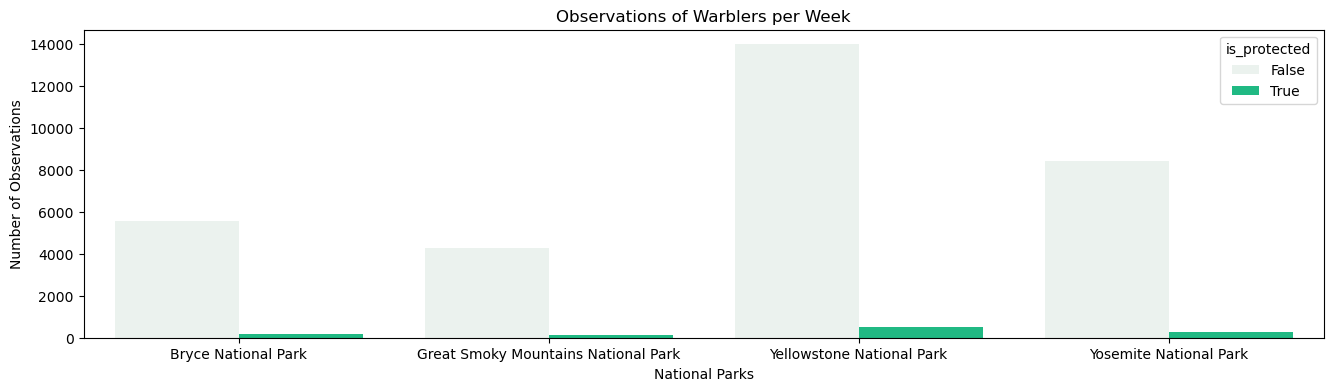

In [27]:
plt.figure(figsize=(16, 4))
sns.barplot(x=warbler_obs_by_park.park_name, y= warbler_obs_by_park.observations, color = '#07d28a', hue=warbler_obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')
plt.savefig('warbler_obs.png', dpi = 600)
plt.show()

### Sparrows

In [28]:
species['is_sparrow'] = species.common_names.str.contains(r'\b[sS]parrow\b', regex = True)
sparrow_observations = obs.merge(species[species.is_sparrow])

print(f'Total sparrow observations across parks: {sum(sparrow_observations.observations)}.')
print(f'Of {len(species[species.is_sparrow])} observed sparrow species, {len(species[species.is_sparrow & species.is_protected == True])}\
are protected, or {(len(species[species.is_sparrow & species.is_protected == True]))/(len(species[species.is_sparrow])) * 100}%.')

sparrow_obs_by_park = sparrow_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park(sparrow_obs_by_park)

Total sparrow observations across parks: 17467.
Of 29 observed sparrow species, 4are protected, or 13.793103448275861%.


,park_name,is_protected,observations,percent_observed
0,Bryce National Park,False,2610,87.407904
1,Bryce National Park,True,376,12.592096
2,Great Smoky Mountains National Park,False,2034,89.367311
3,Great Smoky Mountains National Park,True,242,10.632689
4,Yellowstone National Park,False,6653,88.119205
5,Yellowstone National Park,True,897,11.880795
6,Yosemite National Park,False,4095,87.969925
7,Yosemite National Park,True,560,12.030075


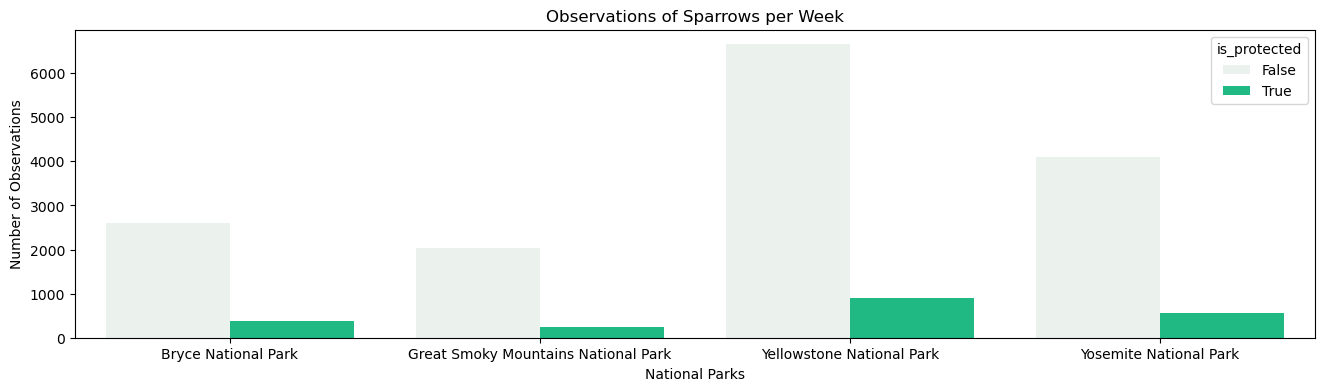

In [29]:
plt.figure(figsize=(16, 4))
sns.barplot(x=sparrow_obs_by_park.park_name, y= sparrow_obs_by_park.observations, color = '#07d28a', hue=sparrow_obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Sparrows per Week')
plt.savefig('sparrow_obs.png', dpi = 600)
plt.show()

### Hawks

In [30]:
species['is_hawk'] = species.common_names.str.contains(r'\b[hH]awk\b', regex = True)
hawk_observations = obs.merge(species[species.is_hawk])

print(f'Total hawk observations across parks: {sum(hawk_observations.observations)}.')
print(f'Of {len(species[species.is_hawk])} observed hawk species, {len(species[species.is_hawk & species.is_protected == True])}\
are protected, or {(len(species[species.is_hawk & species.is_protected == True]))/(len(species[species.is_hawk])) * 100}%.')

hawk_obs_by_park = hawk_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park(hawk_obs_by_park)

Total hawk observations across parks: 8335.
Of 13 observed hawk species, 4are protected, or 30.76923076923077%.


,park_name,is_protected,observations,percent_observed
0,Bryce National Park,False,1124,76.828435
1,Bryce National Park,True,339,23.171565
2,Great Smoky Mountains National Park,False,829,77.986830
3,Great Smoky Mountains National Park,True,234,22.013170
4,Yellowstone National Park,False,2782,75.331709
5,Yellowstone National Park,True,911,24.668291
6,Yosemite National Park,False,1615,76.323251
7,Yosemite National Park,True,501,23.676749


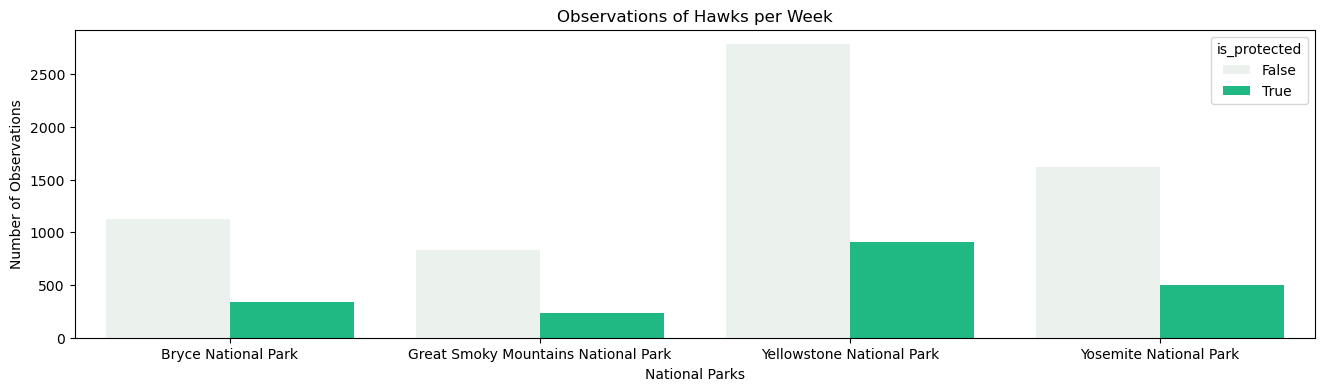

In [31]:
plt.figure(figsize=(16, 4))
sns.barplot(x=hawk_obs_by_park.park_name, y= hawk_obs_by_park.observations, color = '#07d28a', hue=hawk_obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Hawks per Week')
plt.savefig('hawk_obs.png', dpi = 600)
plt.show()

From the above animal observation analysis, it is clear that the most prevelant animal across the combination of all parks is the warbler. Further analysis was conducted within the mammal category on the most observed and protected species, the bat, second most observed species, the shrew, and the second most observed protected species, the wolf. The same analysis was performed on the bird species category with Warblers as most observed, sparrows as second most observed and most protected, and hawks as second most protected. Overall, less protected species were observed across parks amongst the bird category than mammals with the exception of shrews.

# Evaluation

Utilizing the two provided datasets, multiple visualizations and inferences can be made about species conservation and observation in 4 National Parks. Specifically, this project answered the following questions:

1. What is the distribution of conservation status across species?

    * The majority of species fall within the No Intervention category, at 5633:191. Of protected species, the highest distribution is within species of concern with a count of 161, in which all categories of species are present. The in recovery status only contains birds and mammals, there are no nonvascular plants or reptiles in the endangered category, and those 2 categories along with birds are also not in the threatened status. Birds have the highest number of species in conservation by scientific name overall at 72.0, followed by vascular plants at 43.0, then mammals at 28.0.
    
2. Are certain species more likely to face endangerment than others?

    * Yes, mammal and bird species are most likely to fall into the protected category. Birds have the highest count of protected species at 75, followed by vascular plants at 46, and mammals at 30. The lowest is reptiles and nonvascular plants, with a count of 5. The percent protected is highest with mammals at 17%, followed by birds at 15%. The lowest is vascular plants at 1%.
    
3. Is there a significant difference between species and their conservation status?
    
    * When comparing mammal and bird conservation, there is not a statistically significant differnce in conservation percentage. However, mammals and reptiles demonstrate a statistically significant difference, indicating that mammals require a significantly higher rate of conservation efforts.
    
4. What animal, if any, appears to be closest to facing exctinction at this time? What is it's distribution across parks?

   * Based on the current data, the animal with the highest percentage of protected varities is the wolf. 57% of the 7 wolf species mentioned are under protected status, the largest percentage from this dataset. The overall observed wolf population observed is only 4014, also the smallest obesrved. Of these observations, 55.1% were protected on average. Yellowstone and Yosemite Park had slightly above average protected observations, at 58.92% and 59.24% respectively. With a low overall observed population, and greater that 50% of that population falling into the protected category, wolves appear to have the greatest risk of facing extinction among these species.

5. Is there an animal that is more prevelant than others? Does this prevelance differ across parks?

    * The warbler is most prevelant animal species across parks with 33394 observations over 7 days. 5% of the 59 warbler varieties are under protected status, however the average observation of protected warblers is 3.29% across parks. Overall, the distribution of protected and unprotected warbler sightings is consistent across all parks. This data suggests that current conservation efforts across all parks at the sample level is unable to maintain the same distribution of protected versus unprotected warblers as the population.

## Further Expansion

* The current sample data for observations only records animal sightings over a 7 day period. This is a short amount of time to develop sound conclusions. A lengthier study that considers environmental impacts such as seasonality, weather patterns, and food scarcity, and animal behavior such as migration, may yeild more accurate results. 
* Other considerations, such as park area, should be considered when analyzing this dataset. Yellowstone consistently has the most sightings across all species, which is likely because it has the largest area of the parks in this dataset at 8,983.18 km2, almost three times the size of the next largest listed park, Yosemite, with an area of 3,074.1 km2. 
* The Great Smoky Mountains National Park consistently has the least number of sightings, despite having an area almost 15 times the size of the smallest park listed, Bryce. This may be due to the location and associated factors with the Great Smoky Mountains park, as it is the only listed park close to the East coast of the United States in Tennessee. The other three parks span the West and Midwestern US, from Wyoming, to Utah, and California. Less clustered data from a more widespread collection of parks could reveal if this behavior is typical of that region.